In [155]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn

In [541]:
def image_to_matrix(file_name):
    img = Image.open('../../../X_2.png')
    matrix = np.asarray(img.convert(mode='L')).copy()
    matrix[matrix != 255] = 1
    matrix[matrix == 255] = 0
    return matrix

def matrix_to_train_set(mat):
    x1 = np.arange(mat.shape[0])
    x2 = np.arange(mat.shape[1])
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    x1_flatten, x2_flatten, y_flatten = x1_grid.flatten().reshape(-1, 1),\
                                        x2_grid.flatten().reshape(-1, 1),\
                                        mat.flatten().reshape(-1, 1)    
    train_set = np.hstack((x1_flatten, x2_flatten, y_flatten))
    return train_set

In [552]:
file_name = '../../../X_2.png'
mat = image_to_matrix(file_name)

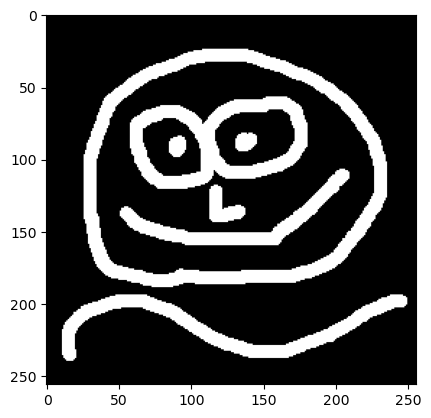

In [553]:
plt.imshow(mat, cmap='gray')

In [554]:
train_set = matrix_to_train_set(mat)
train_set.shape

(65536, 3)

## Define a model

In [555]:
class Representor(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_1 = nn.Linear(input_shape, hidden_units)
        self.layer_2 = nn.Linear(hidden_units, hidden_units)
        self.layer_3 = nn.Linear(hidden_units, hidden_units)
        self.layer_4 = nn.Linear(hidden_units, hidden_units)
        self.layer_5 = nn.Linear(hidden_units, hidden_units)
        self.layer_6 = nn.Linear(hidden_units, output_shape)
        self.activation = nn.LeakyReLU()
#         self.activation = nn.Sigmoid()
        
    
    def forward(self, x):
        x = self.layer_6(\
            self.activation(self.layer_5(\
            self.activation(self.layer_4(\
            self.activation(self.layer_3(\
            self.activation(self.layer_2(\
            self.activation(self.layer_1(x)))))))))))
        return x

In [556]:
X = torch.Tensor(train_set[:, :2])
X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].mean()
X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].mean()

y = torch.Tensor(train_set[:, -1])

In [557]:
# X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = torch.Tensor([0, 1, 1, 0])

In [558]:
model_1 = Representor(2, 1000, 1)

In [559]:
def accuracy(y_true, y_pred):
    return torch.mean((y_true == y_pred).type(torch.float))

In [565]:
# loss_fn = nn.BCEWithLogitsLoss()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=100)

epoch 0, loss: 0.15175116062164307


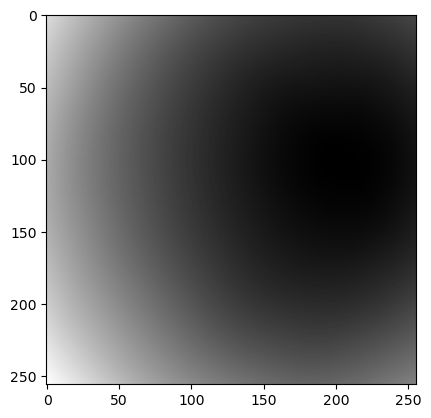

epoch 1, loss: 0.6012760996818542


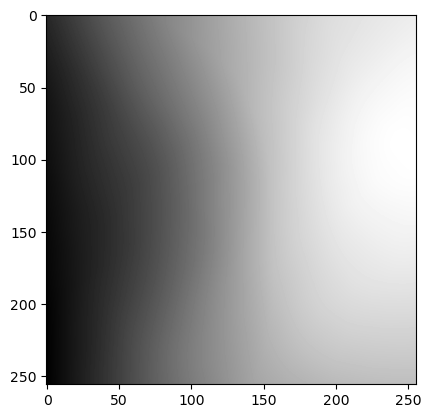

epoch 2, loss: 0.205780029296875


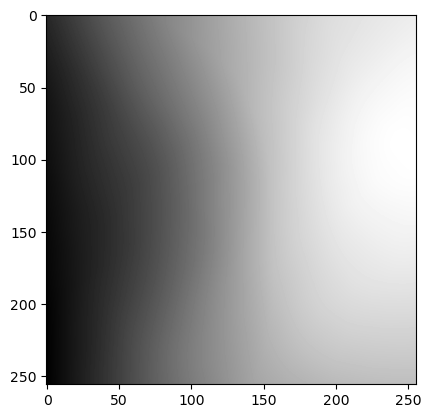

epoch 3, loss: 0.205780029296875


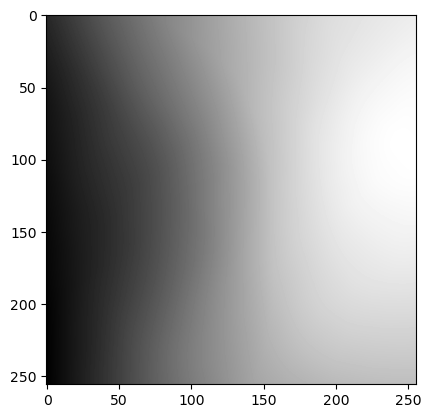

epoch 4, loss: 0.205780029296875


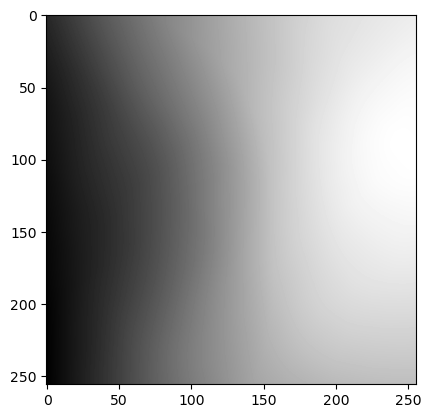

epoch 5, loss: 0.205780029296875


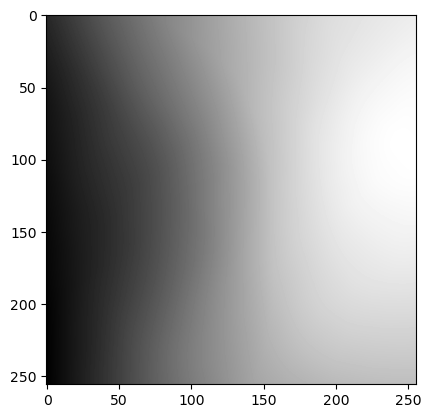

epoch 6, loss: 0.205780029296875


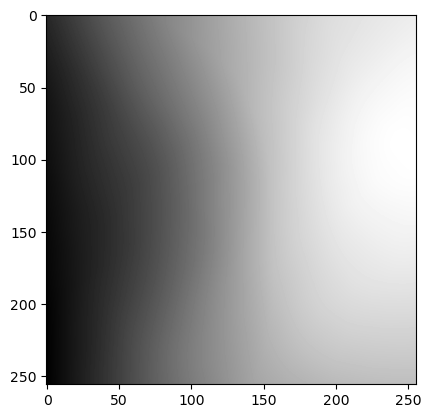

epoch 7, loss: 0.205780029296875


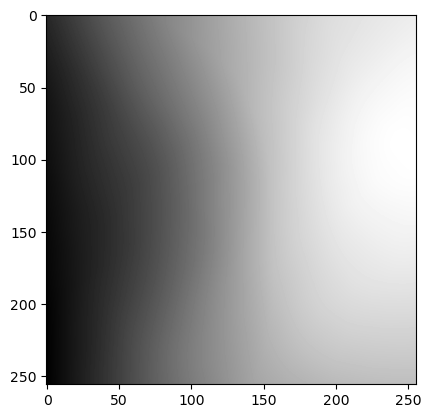

epoch 8, loss: 0.205780029296875


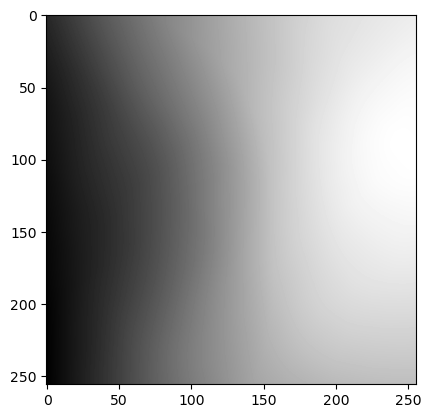

epoch 9, loss: 0.205780029296875


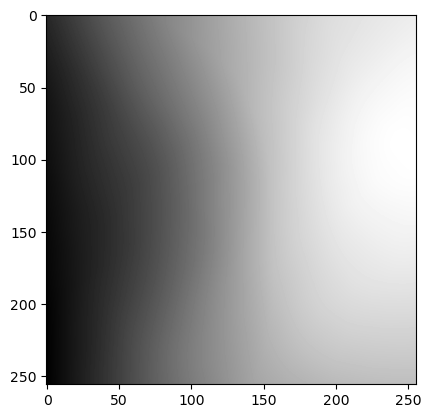

epoch 10, loss: 0.205780029296875


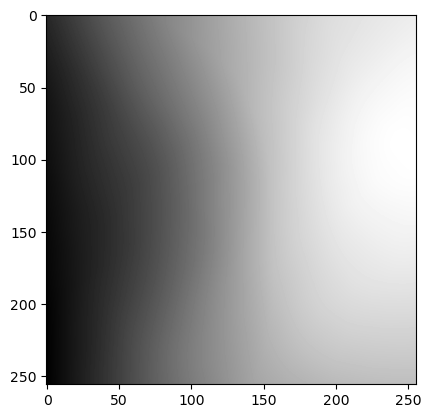

epoch 11, loss: 0.205780029296875


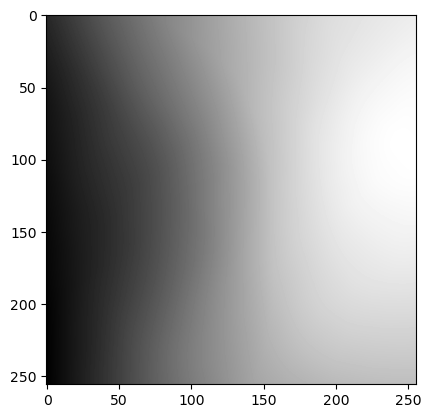

epoch 12, loss: 0.205780029296875


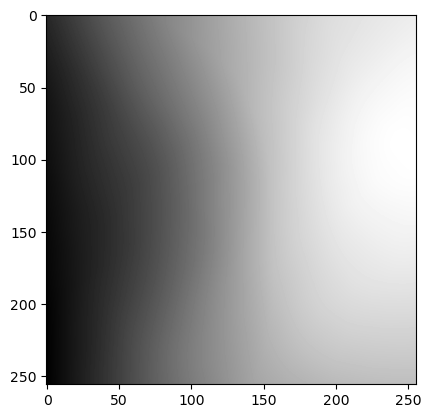

epoch 13, loss: 0.205780029296875


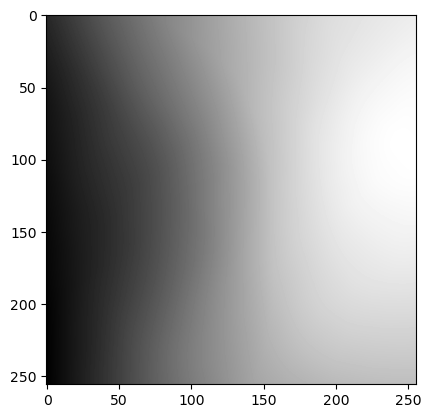

epoch 14, loss: 0.205780029296875


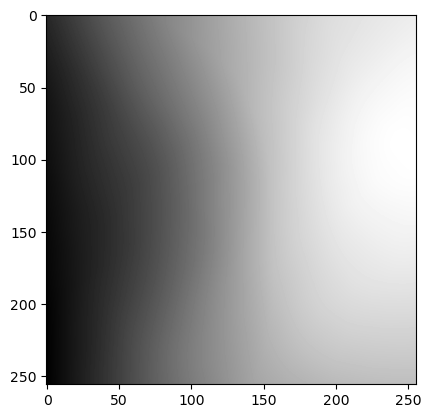

epoch 15, loss: 0.205780029296875


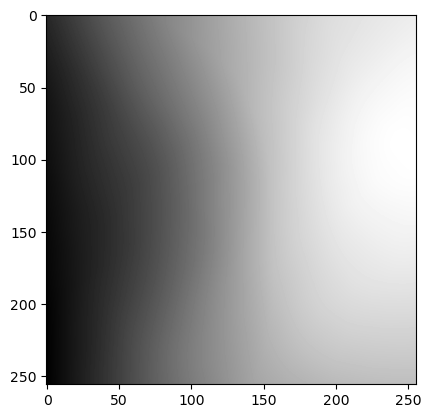

KeyboardInterrupt: 

In [566]:
losses = []
accs = []

epochs = 1000
for epoch in range(epochs):
    ### Trainig
    model_1.train()
    
    # forward pass
    y_logits = model_1(X).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    
    # calculate the loss function
    # cross entropy
#     loss = loss_fn(y_logits, y)
#     losses.append(loss.item())
#     acc = accuracy(y, y_pred)
#     accs.append(acc)
    # MSE
    loss = loss_fn(torch.sigmoid(y_logits), y)
    acc=0
    
    # optimizer zero grad
    optimizer.zero_grad()
    
    # loss backward
    loss.backward()
    
    # optimizer step
    optimizer.step()
    
    if (epoch % 1) == 0:
        with torch.inference_mode():
            model_1.eval()
            y_logits = model_1.forward(X)
            y_pred = torch.round(torch.sigmoid(y_logits))
#         acc = accuracy(y_pred, y)
        print(f'epoch {epoch}, loss: {loss}')
        plt.close()
        plt.imshow(y_logits.reshape(256, 256), cmap='gray')
        plt.show()

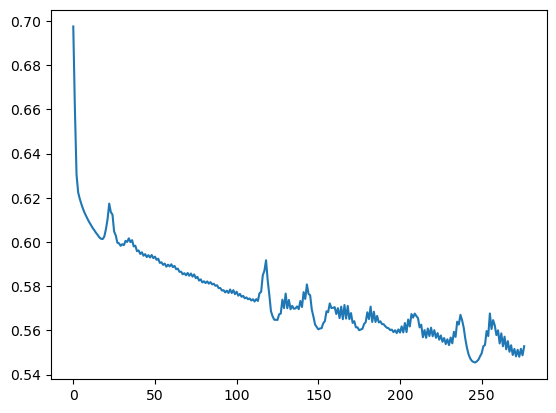

In [490]:
plt.plot(range(len(losses)), losses)

In [491]:
with torch.inference_mode():
    model_1.eval()
    y_logits = model_1.forward(X)
    y_pred = torch.round(torch.sigmoid(y_logits))
    

In [492]:
accuracy(y_pred, y)

tensor(0.6165)

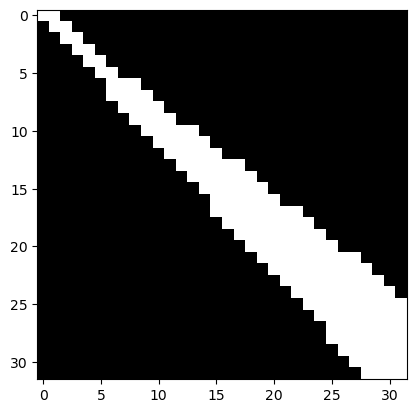

In [493]:
plt.imshow(y_pred.reshape(32, 32), cmap='gray')